## ライブラリのインポートとインストール

In [43]:
!pip install face_recognition

In [44]:
import face_recognition

face_recognitionはノートブックの設定を「GPU」にしなければエラーが起こるので注意です。

In [45]:
# 画像取扱い用
from PIL import Image, ImageDraw
# Colabでファイルをアップロード用
from google.colab import files

In [46]:
ls

'girl01 (1).jpg'  'girl03 (1).jpg'  'men02 (1).jpg'  'men04 (1).jpg'
 girl01.jpg        girl03.jpg        men02.jpg        men04.jpg
'girl02 (1).jpg'  'men01 (1).jpg'   'men03 (1).jpg'   men05.jpg
 girl02.jpg        men01.jpg         men03.jpg        sample_data/


## 画像ファイルのアップロード

In [47]:
files.upload()

Saving girl01.jpg to girl01 (2).jpg
Saving girl02.jpg to girl02 (2).jpg
Saving girl03.jpg to girl03 (2).jpg
Saving men01.jpg to men01 (2).jpg
Saving men02.jpg to men02 (2).jpg
Saving men03.jpg to men03 (2).jpg
Saving men04.jpg to men04 (2).jpg
Saving men05.jpg to men05 (1).jpg


{'girl01.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\xc7\x00\xb7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16

In [48]:
ls

'girl01 (1).jpg'  'girl03 (1).jpg'  'men02 (1).jpg'  'men04 (1).jpg'
'girl01 (2).jpg'  'girl03 (2).jpg'  'men02 (2).jpg'  'men04 (2).jpg'
 girl01.jpg        girl03.jpg        men02.jpg        men04.jpg
'girl02 (1).jpg'  'men01 (1).jpg'   'men03 (1).jpg'  'men05 (1).jpg'
'girl02 (2).jpg'  'men01 (2).jpg'   'men03 (2).jpg'   men05.jpg
 girl02.jpg        men01.jpg         men03.jpg        sample_data/


あらかじめ、顔の画像は200px x 200px で納めています。<br>
データが大きすぎると正しく判別できないので注意です。

## 顔認識

In [49]:
# 画像データの読み込み
image = face_recognition.load_image_file('girl01.jpg')
# 顔の位置情報(座標)の検出
face_locations = face_recognition.face_locations(image)
face_locations

[(68, 139, 175, 32)]

In [50]:
image

array([[[204, 240, 254],
        [204, 240, 254],
        [204, 240, 254],
        ...,
        [201, 234, 253],
        [201, 234, 253],
        [201, 234, 253]],

       [[204, 240, 254],
        [204, 240, 254],
        [204, 240, 254],
        ...,
        [202, 235, 254],
        [202, 235, 254],
        [202, 235, 254]],

       [[204, 240, 254],
        [204, 240, 254],
        [204, 240, 254],
        ...,
        [202, 235, 254],
        [202, 235, 254],
        [202, 235, 254]],

       ...,

       [[149, 188, 205],
        [149, 188, 205],
        [149, 188, 205],
        ...,
        [138, 176, 195],
        [137, 175, 194],
        [137, 175, 194]],

       [[149, 188, 205],
        [149, 188, 205],
        [149, 188, 205],
        ...,
        [137, 175, 194],
        [137, 175, 194],
        [137, 175, 194]],

       [[149, 188, 205],
        [148, 187, 204],
        [148, 187, 204],
        ...,
        [137, 175, 194],
        [136, 174, 193],
        [136, 174, 193]]

## 顔の位置を描画

In [51]:
def face_detection(image,face_locations):
  #座標の調整
  face_locations = (face_locations[0][1], face_locations[0][0],face_locations[0][3],face_locations[0][2])
  #数値データから画像に変換
  im = Image.fromarray(image)
  #画像を格納
  draw = ImageDraw.Draw(im)
  #顔の周りを線で囲む
  draw.rectangle(face_locations, fill= None, outline=(255,0,0), width=5)
  return im

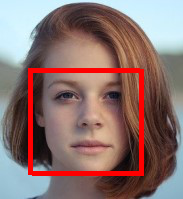

In [52]:
face_detection(image,face_locations)

きちんと顔だけを検出していることがわかります。<br>
他の画像でも試してみましょう

In [53]:
image02 = face_recognition.load_image_file('girl02.jpg')
image03 = face_recognition.load_image_file('men01.jpg')

In [54]:
face_locations02 = face_recognition.face_locations(image02)

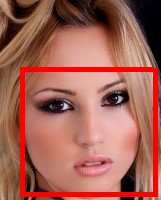

In [55]:
face_detection(image02,face_locations02)

In [56]:
face_locations03 = face_recognition.face_locations(image03)

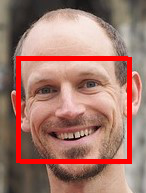

In [57]:
face_detection(image03,face_locations03)

In [58]:
image04 = face_recognition.load_image_file('men02.jpg')
face_locations04 = face_recognition.face_locations(image04)

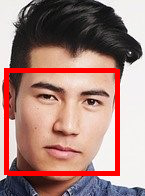

In [59]:
face_detection(image04,face_locations04)

問題なく顔部分の検出ができています。<br>
face_recognitionをインストールするだけで簡単に実装が可能です。

## 顔の類似度を測る

In [60]:
# 画像を格納
image05 = face_recognition.load_image_file('girl03.jpg')
image06 = face_recognition.load_image_file('men03.jpg')

In [61]:
# 画像をエンコーディングして変数に格納
enc1 = face_recognition.face_encodings(image05)[0]
enc2 = face_recognition.face_encodings(image06)[0]

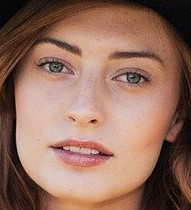

In [62]:
# 画像を表示
Image.fromarray(image05)

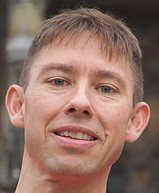

In [63]:
Image.fromarray(image06)

上の画像、２つの類似度を数値で表示することができます。

In [64]:
# 画像の比較(True,Falseで返す)
face_recognition.compare_faces([enc1], enc2, tolerance=0.5)

[False]

見ての通りではありますが、Falseということは違う人物だと判定してくれています。<br>
今度は同一人物の別写真で比較してみましょう。

In [65]:
# image04と同一人物の画像
image07 = face_recognition.load_image_file('men05.jpg')

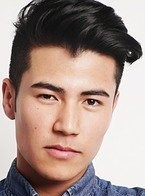

In [66]:
#画像の表示
Image.fromarray(image04)

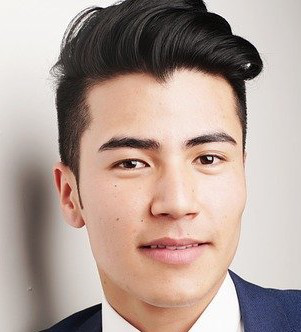

In [67]:
Image.fromarray(image07)

角度も大きさも若干違いますが、同一人物の画像です。<br>
これで同一人物と判定できるか確かめてみましょう。

In [68]:
enc3 = face_recognition.face_encodings(image04)[0]
enc4 = face_recognition.face_encodings(image07)[0]

In [69]:
face_recognition.compare_faces([enc3], enc4, tolerance=0.5)

[True]

きちんと同一人物という判定が出ました。

## 特徴の検出

In [70]:
# 特徴の位置を描画する前設定
def tokuchou_point(xy1,size=5):
  xy2 = xy1[0]+size,xy1[1] + size
  return [(xy1), (xy2)]

### image04の場合

In [71]:
#ランドマークの検出
face_landmarks = face_recognition.face_landmarks(image04)

In [72]:
im = Image.fromarray(image04)
draw = ImageDraw.Draw(im)

In [73]:
# 画像の特徴を捉えて描画する
for face_landmark in face_landmarks[0]:
  for xy in face_landmarks[0][face_landmark]:
    draw.ellipse(tokuchou_point(xy,size=5), outline=(255,0,0),fill=(255,0,0))

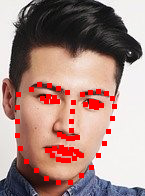

In [74]:
im

### image07の場合

In [75]:
face_landmarks = face_recognition.face_landmarks(image07)
im1 = Image.fromarray(image07)
draw1 = ImageDraw.Draw(im1)

In [76]:
for face_landmark in face_landmarks[0]:
  for xy in face_landmarks[0][face_landmark]:
    draw1.ellipse(tokuchou_point(xy,size=5), outline=(255,0,0),fill=(255,0,0))

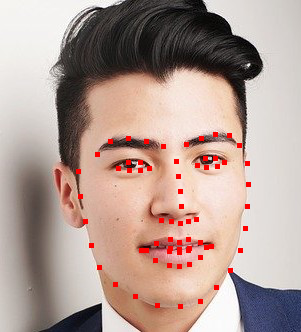

In [77]:
im1

輪郭や目の位置などを捉えて楕円を描いています。<br>
これが画像の特徴量になっていて、それを元に画像の類似度を判断しています。